In [ ]:
#importing data

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("C:/Users/Tanisha/Downloads/GASREGCOVW.csv")

In [3]:
df.head()

,DATE,GAS
0,20-08-1990,1.191
1,27-08-1990,1.245
2,03-09-1990,1.242
3,10-09-1990,1.252
4,17-09-1990,1.266


In [ ]:
#Data preprocessing and EDA

In [4]:
df['DATE']=pd.to_datetime(df['DATE'])

In [5]:
df['DAY']=df['DATE'].dt.dayofweek

In [6]:
df['WEEK']=df['DATE'].dt.isocalendar().week

In [7]:
df['MONTH']=df['DATE'].dt.month

In [8]:
df['YEAR']=df['DATE'].dt.year

In [9]:
df.set_index('DATE',inplace=True)

In [10]:
df.head()

,GAS,DAY,WEEK,MONTH,YEAR
DATE,,,,,
1990-08-20,1.191,0,34,8,1990
1990-08-27,1.245,0,35,8,1990
1990-09-03,1.242,0,36,9,1990
1990-09-10,1.252,0,37,9,1990
1990-09-17,1.266,0,38,9,1990


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Gas price over years')

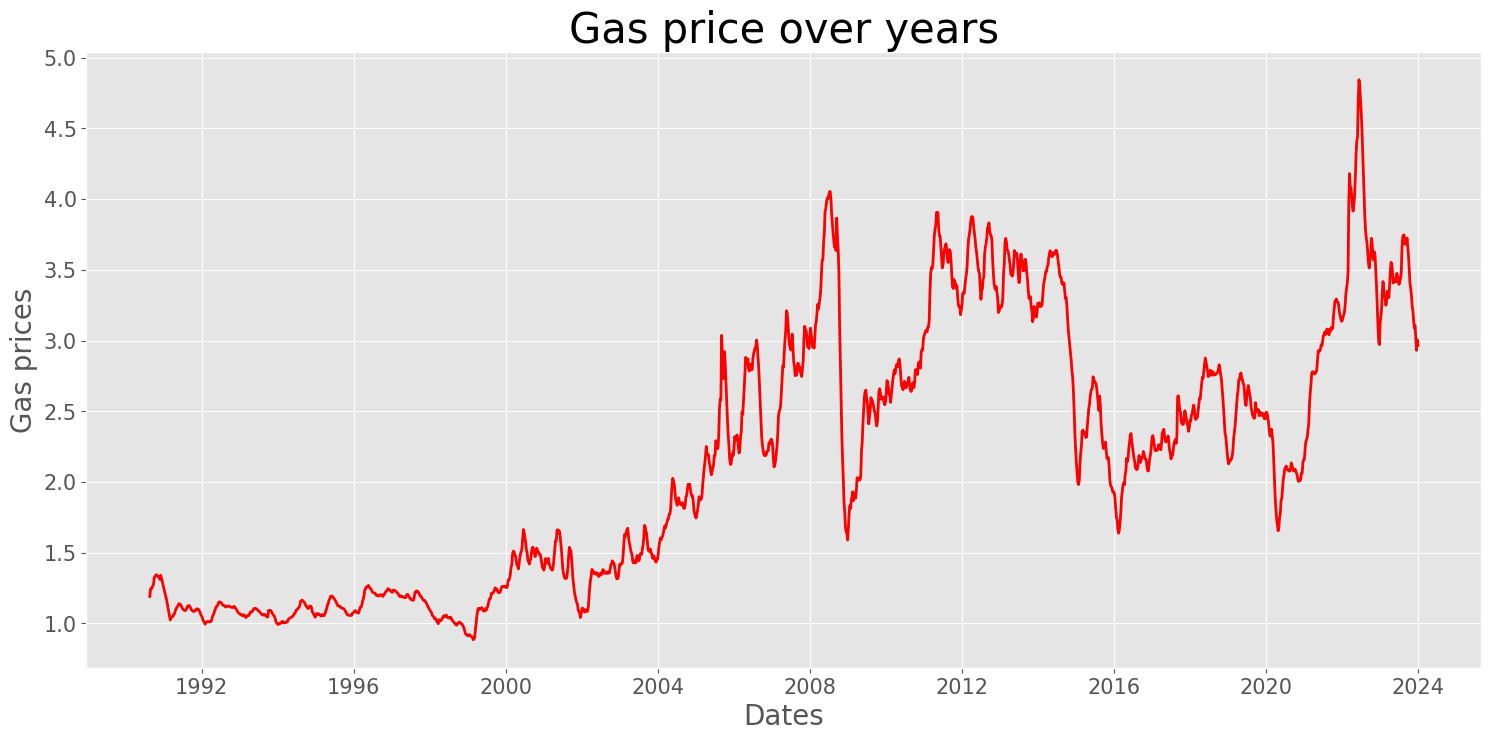

In [23]:
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates', fontsize= (20))
plt.xticks(fontsize = 15)
plt.ylabel('Gas prices', fontsize = 20)
plt.yticks(fontsize= 15)
plt.plot(df['GAS'], linewidth = 2, color = 'red')
plt.title('Gas price over years', fontsize= 30 )


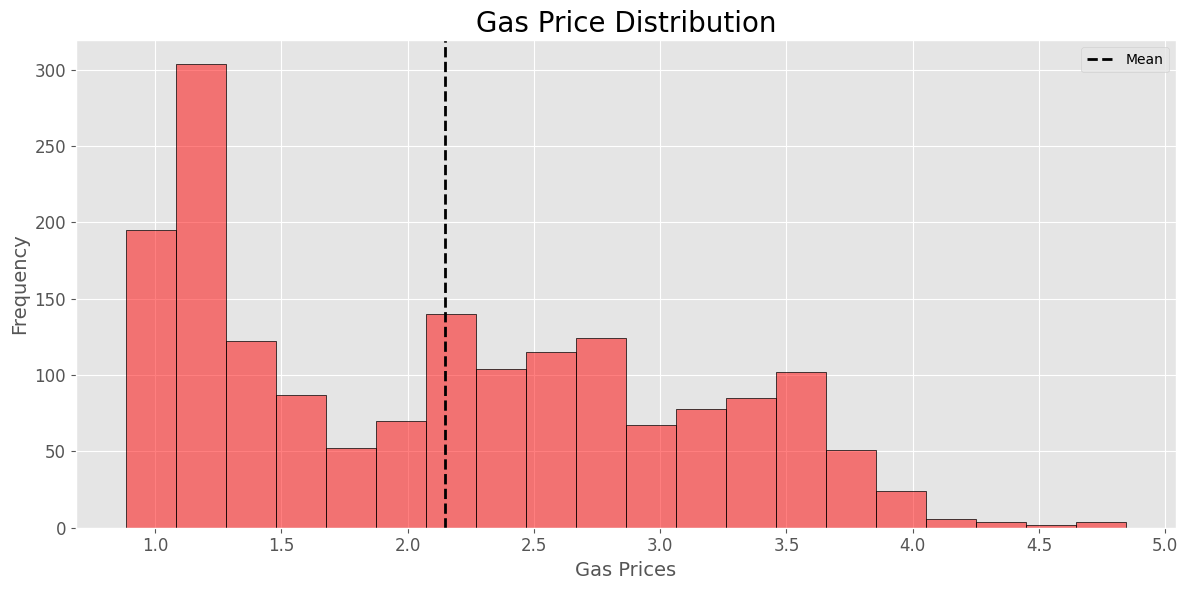

In [13]:
plt.figure(figsize=(12, 6))
sns.histplot(df['GAS'],bins=20,kde=False, color='red', edgecolor='black',alpha=0.5)
plt.title('Gas Price Distribution', fontsize=20)
plt.xlabel('Gas Prices', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.axvline(df['GAS'].mean(), color='black', linestyle='dashed', linewidth=2, label='Mean')
plt.legend()
plt.tight_layout()
plt.show()

Text(0.5, 0, '')

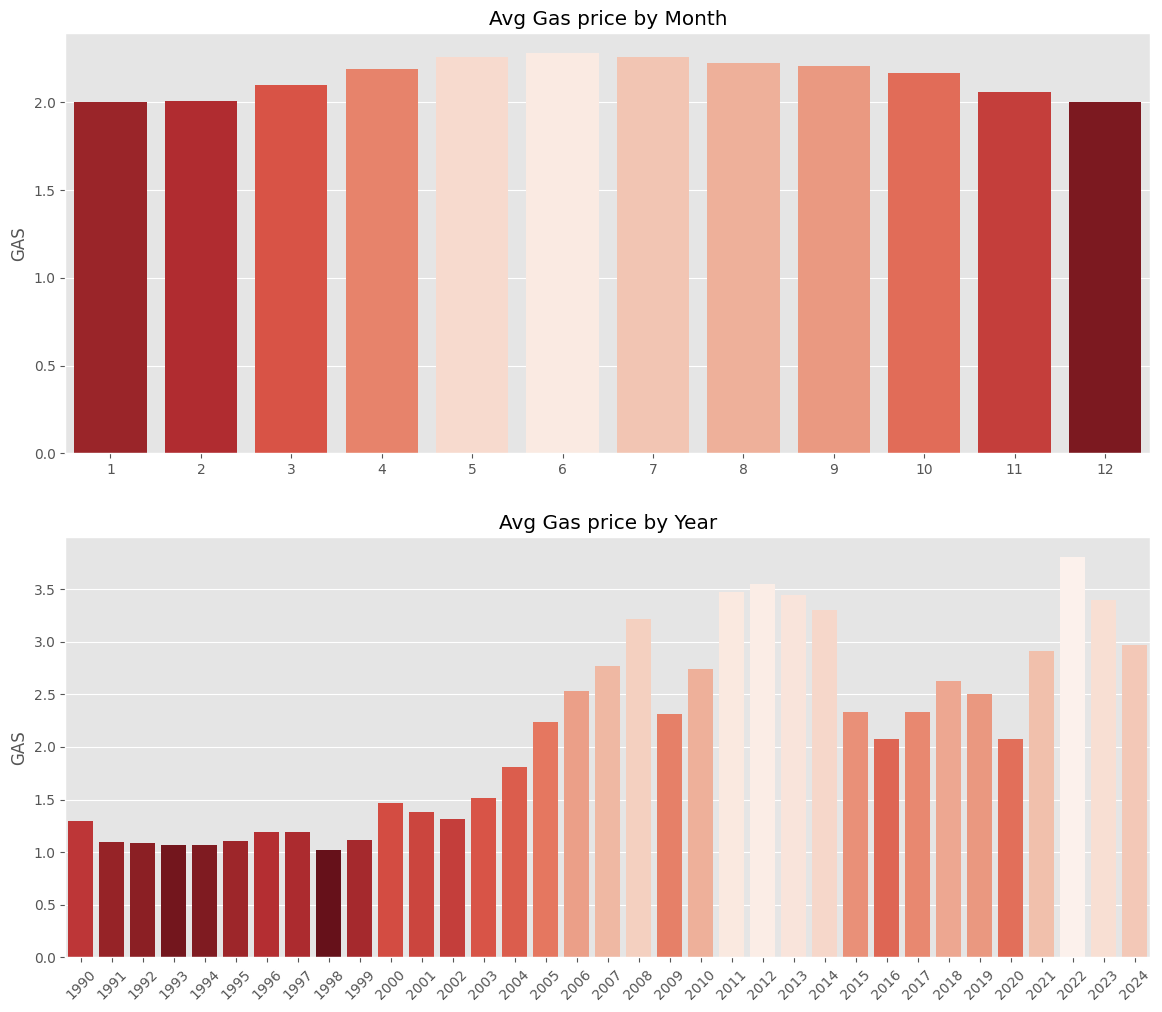

In [26]:
import numpy as np

grouped_m=df.groupby('MONTH').mean().reset_index()
grouped_y=df.groupby('YEAR').mean().reset_index()

f, (ax1, ax2)=plt.subplots(2,1 ,figsize=(14,12))

ax1.set_title('Avg Gas price by Month')
pal = sns.color_palette("Reds", len(grouped_m))
rank = grouped_m['GAS'].argsort().argsort() 
g = sns.barplot(x='MONTH', y='GAS', data=grouped_m, palette=np.array(pal[::-1])[rank],ax=ax1)
ax1.set_xlabel('')

ax2.set_title('Avg Gas price by Year')
pal = sns.color_palette("Reds", len(grouped_y))
rank = grouped_y['GAS'].argsort().argsort() 
g = sns.barplot(x="YEAR", y='GAS', data=grouped_y, palette=np.array(pal[::-1])[rank],ax=ax2)
plt.xticks(rotation=45, fontsize=10)
ax2.set_xlabel('')


In [15]:
#checking if data is stationary

Text(0, 0.5, 'Dates')

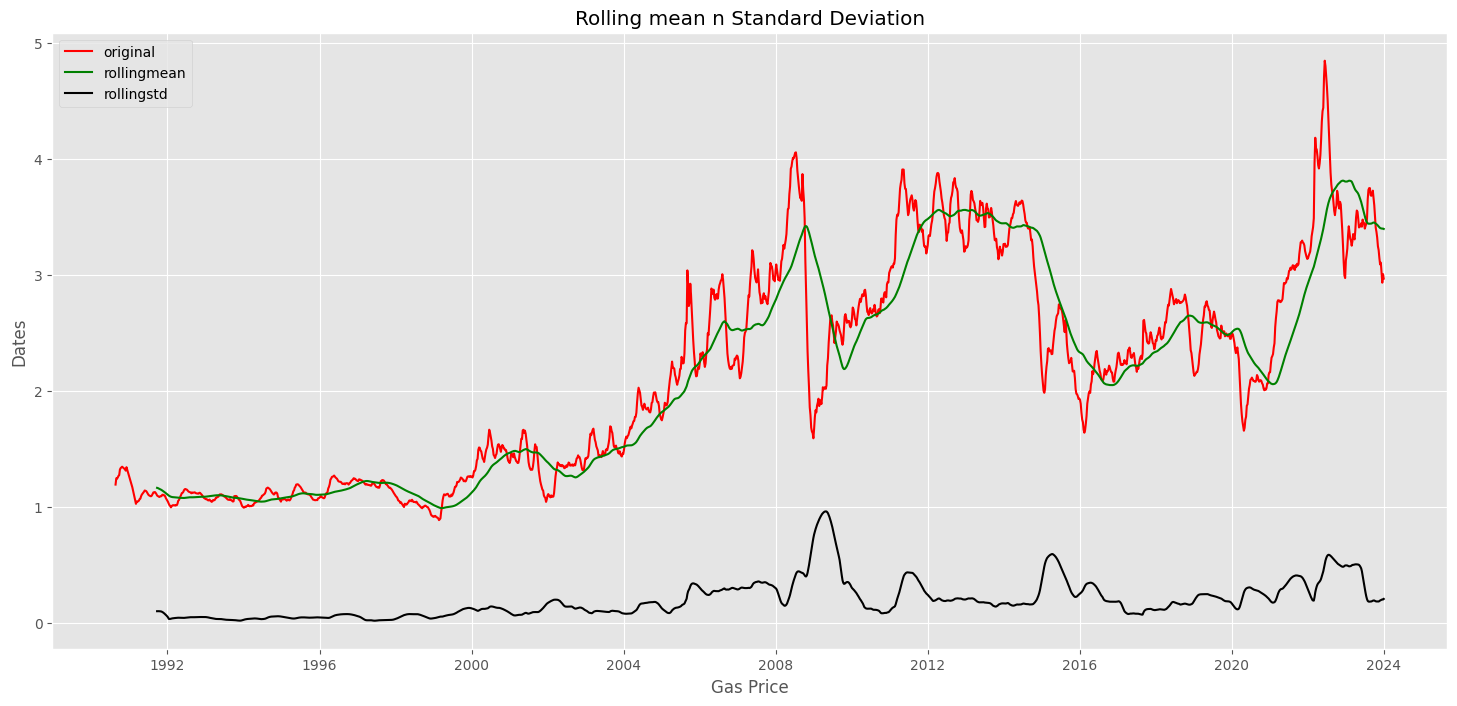

In [16]:
#rolling mean statistics
rolmean=df['GAS'].rolling(window=52).mean()
rolstd=df['GAS'].rolling(window=52).std()

plt.figure(figsize=(18,8))
plt.plot(df['GAS'],color='red',label='original')
plt.plot(rolmean,color='green',label='rollingmean')
plt.plot(rolstd,color='black',label='rollingstd')
plt.legend(loc="best")
plt.title('Rolling mean n Standard Deviation')
plt.xlabel("Gas Price")
plt.ylabel("Dates")

In [17]:
#Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
adft = adfuller(df.GAS)
pd.Series(adft[0:4], index= ['test stats', 'P-value', 'lag', 'data points'])

test stats       -1.633807
P-value           0.465499
lag              25.000000
data points    1710.000000
dtype: float64

In [18]:
#making data stationary by calculating the first difference
df_gas = df['GAS'].diff()
df_gas.dropna(inplace=True)

Text(0, 0.5, 'Dates')

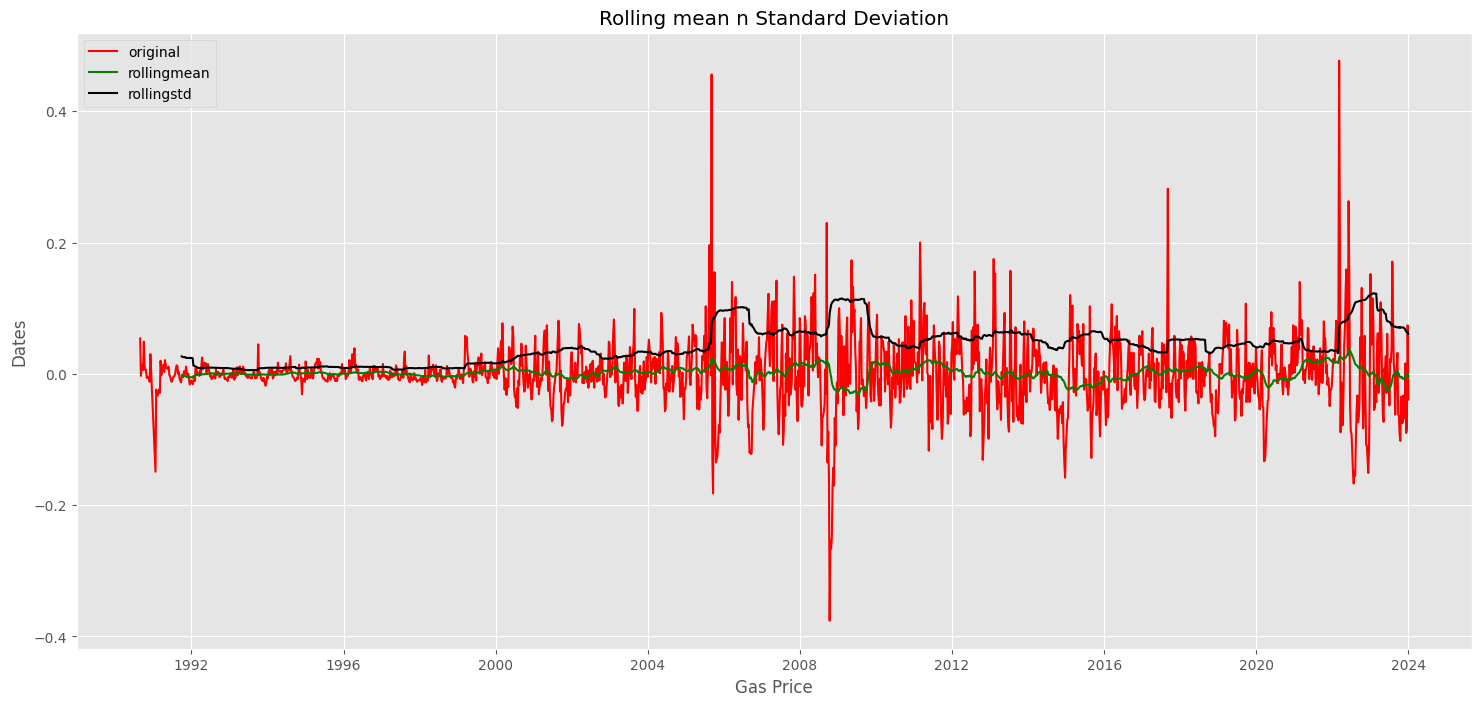

In [19]:
#rolling mean statistics
rolmean=df_gas.rolling(window=52).mean()
rolstd=df_gas.rolling(window=52).std()

plt.figure(figsize=(18,8))
plt.plot(df_gas,color='red',label='original')
plt.plot(rolmean,color='green',label='rollingmean')
plt.plot(rolstd,color='black',label='rollingstd')
plt.legend(loc="best")
plt.title('Rolling mean n Standard Deviation')
plt.xlabel("Gas Price")
plt.ylabel("Dates")

In [20]:
#Dickey-Fuller test
adft = adfuller(df_gas)
pd.Series(adft[0:4], index= ['test stats', 'P-value', 'lag', 'data points'])

test stats    -1.028954e+01
P-value        3.600186e-18
lag            2.400000e+01
data points    1.710000e+03
dtype: float64

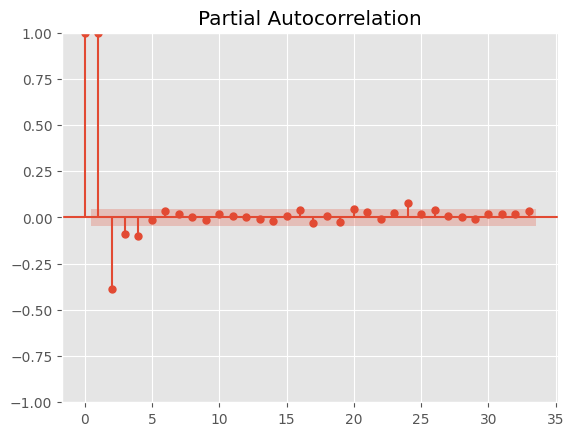

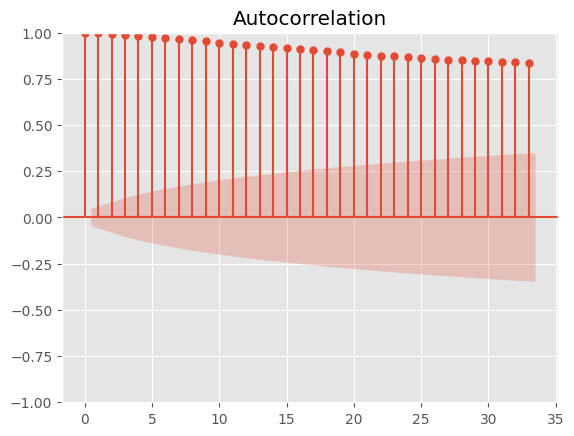

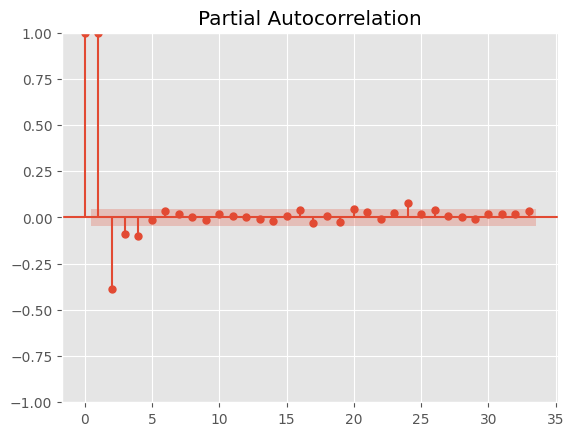

In [22]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df.GAS)
plot_pacf(df.GAS)